In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import math

## Loading data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
FeatureSelection = True
train.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [4]:
test.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,6,14.0,5,-1,46,1011,2,10.0,0.00,180
1,1000,02/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,4,12.0,6,-1,52,1009,3,10.0,5.08,315
2,1000,03/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,11,-3,41,1013,-2,10.0,0.00,210
3,1000,04/03/2018,0,0,0,Hyper Market,General,326,7,9643,...,6,11.0,18,-2,65,1002,1,6.0,3.05,193
4,1000,05/03/2018,0,1,1,Hyper Market,General,326,7,9643,...,6,10.0,23,-5,25,1000,2,8.0,0.25,247


In [5]:
train.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
test.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,37271.00000,...,45689.000000,43068.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,43068.000000,45689.000000,45689.000000
mean,1374.000000,0.032787,0.822649,0.344262,7958.004005,5.556742,13216.973298,14140.499332,3940.098798,5.45797,...,7.009433,13.428323,12.471208,-1.208124,39.309549,1016.101381,1.852853,8.084959,0.462545,188.977522
std,216.219849,0.178080,0.381970,0.475132,11429.943820,3.369348,9793.699417,2730.696157,2782.135496,1.73856,...,3.530816,5.323993,6.766945,3.232898,15.820149,10.503942,3.287485,5.209967,1.275447,112.300400
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,344.000000,9893.000000,816.000000,0.00000,...,-2.000000,2.000000,3.000000,-13.000000,8.000000,979.000000,-6.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.000000,2.000000,7215.000000,11849.000000,1584.000000,5.00000,...,4.000000,10.000000,8.000000,-3.000000,28.000000,1010.000000,0.000000,5.000000,0.000000,71.000000
50%,1374.000000,0.000000,1.000000,0.000000,3307.000000,6.000000,9643.000000,15017.000000,2770.000000,6.00000,...,7.000000,12.000000,11.000000,-1.000000,37.000000,1018.000000,2.000000,9.000000,0.000000,225.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.000000,9.000000,15566.000000,16186.000000,5727.000000,6.00000,...,9.000000,16.000000,14.000000,1.000000,50.000000,1024.000000,4.000000,10.000000,0.000000,273.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,32221.000000,23931.000000,8146.000000,8.00000,...,17.000000,31.000000,39.000000,9.000000,87.000000,1035.000000,12.000000,31.000000,11.940000,360.000000


Dropping tuples with IsOpen = 0 

In [7]:
train = train[train.IsOpen != 0]
train = train.drop(columns=['IsOpen'])
test = test[test.IsOpen != 0]
test = test.drop(columns=['IsOpen'])

## Categorical/NumberOfSales 

In [8]:
train['WindDirDegrees']= train['WindDirDegrees'].apply(lambda x : "Wind "+str(math.floor(x*8/360)))
train['WindDirDegrees']= train['WindDirDegrees'].apply(lambda x : "Wind 0" if x=="Wind 8" else x)

IsHoliday

In [9]:
holy = train['IsHoliday']

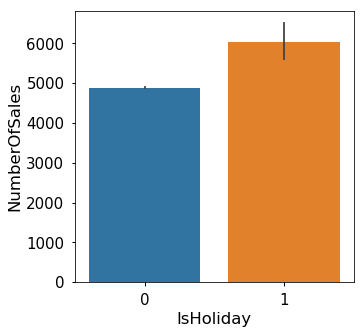

In [10]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(5,5)) 
sns.barplot(x=holy, y="NumberOfSales", data=train)

HasPromotions

In [11]:
promo = train['HasPromotions']

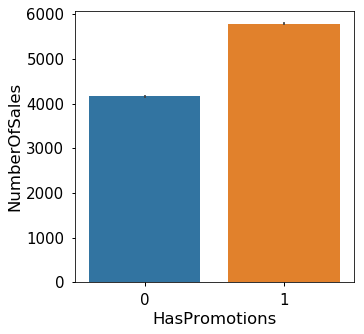

In [12]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(5,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
sns.barplot(x=promo, y="NumberOfSales", data=train)

In [13]:
Stype = train['StoreType']

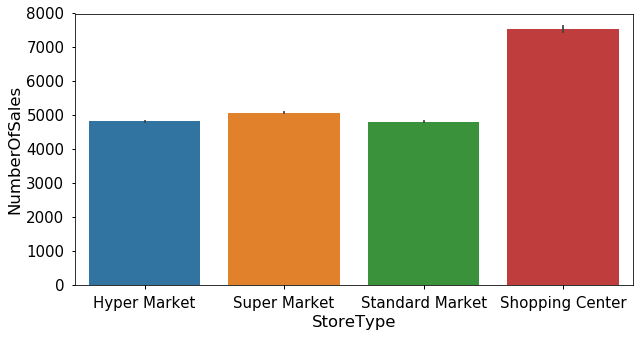

In [14]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
sns.barplot(x=Stype, y="NumberOfSales", data=train)

In [15]:
Atype = train['AssortmentType']

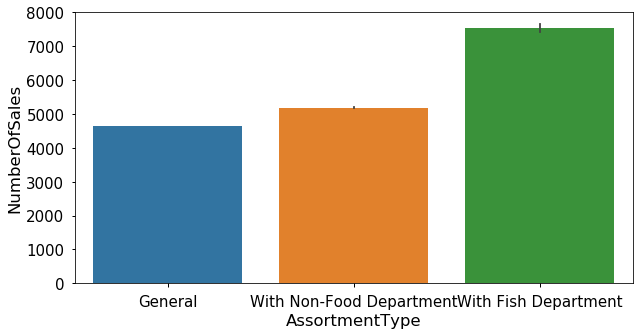

In [16]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
sns.barplot(x=Atype, y="NumberOfSales", data=train)

In [17]:
Region = train['Region']

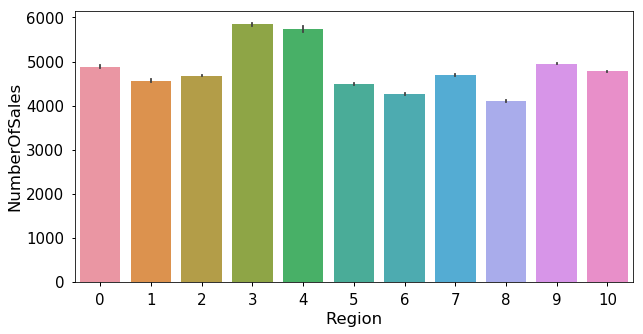

In [18]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
sns.barplot(x=Region, y="NumberOfSales", data=train)

In [19]:
CC = train['CloudCover']

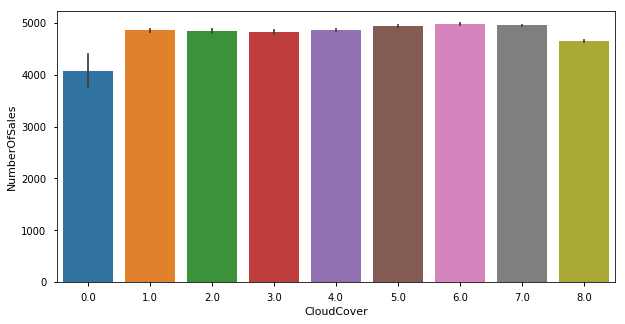

In [20]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=CC, y="NumberOfSales", data=train)

In [21]:
Winds = train['WindDirDegrees']

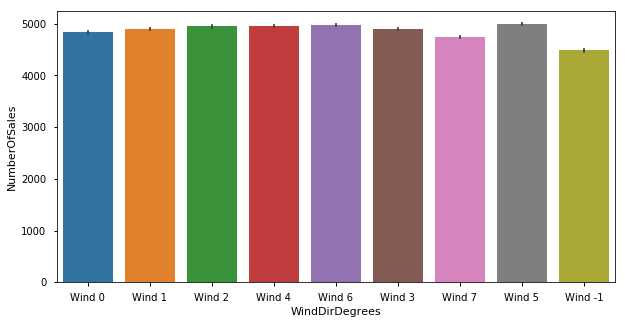

In [22]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=Winds, y="NumberOfSales", data=train)

## Categorical/NumberOfCustomer 

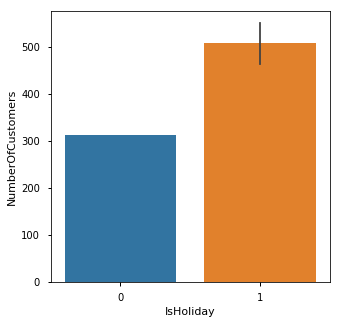

In [23]:
plt.figure(figsize=(5,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=holy, y="NumberOfCustomers", data=train)

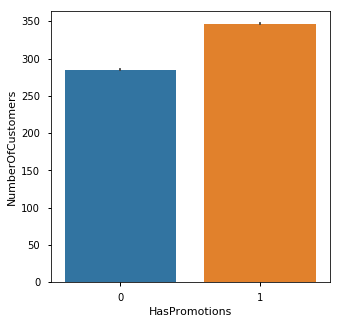

In [24]:
plt.figure(figsize=(5,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=promo, y="NumberOfCustomers", data=train)

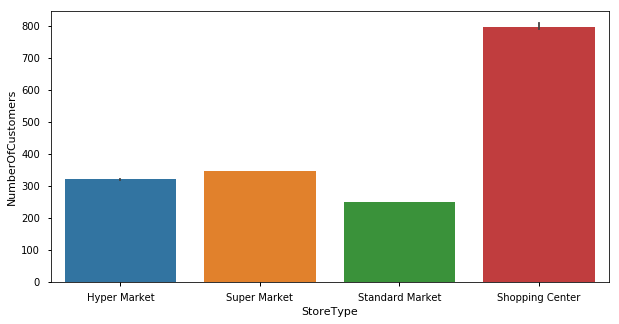

In [25]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=Stype, y="NumberOfCustomers", data=train)

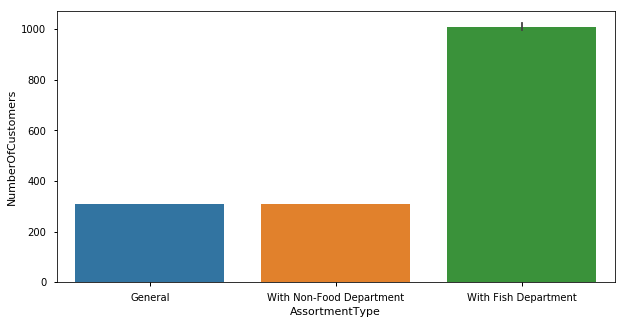

In [26]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=Atype, y="NumberOfCustomers", data=train)

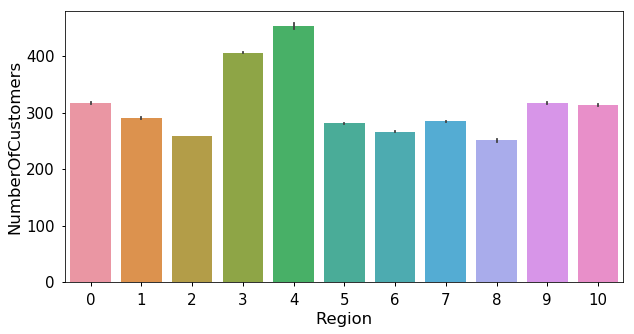

In [27]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
sns.barplot(x=Region, y="NumberOfCustomers", data=train)

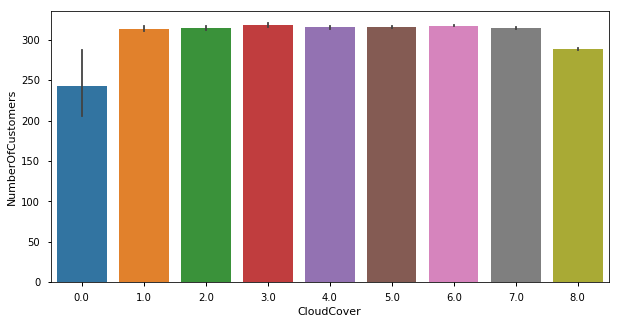

In [28]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=CC, y="NumberOfCustomers", data=train)

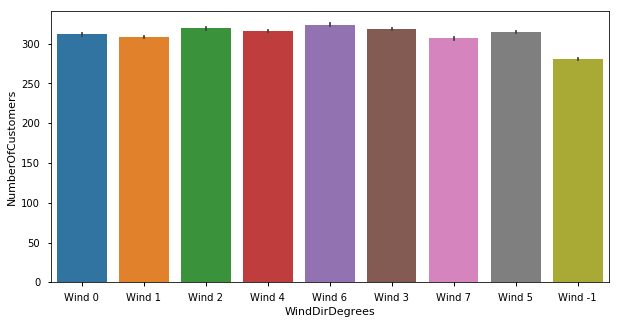

In [29]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
sns.barplot(x=Winds, y="NumberOfCustomers", data=train)

Plotting and transforming the distribution of the NumberOfSales   
Reducing Skewness of the distribution


 mu = 4890.09 and sigma = 2215.40

Skewness: 1.558774
Kurtosis: 4.691952


Text(0.5,1,'NumberOfSales distribution')

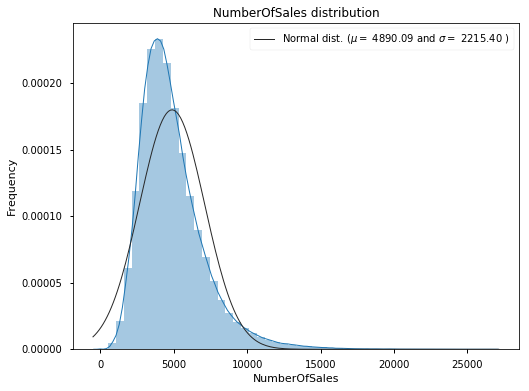

In [30]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

sns.distplot(train['NumberOfSales'] , fit=stats.norm)


(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

In [31]:
train["NumberOfSales"] = np.log1p(train["NumberOfSales"])
train_target =  np.log1p(train["NumberOfSales"]).copy()
(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())


 mu = 8.40 and sigma = 0.44

Skewness: -0.637384
Kurtosis: 10.145847


Text(0.5,1,'NumberOfSales distribution')

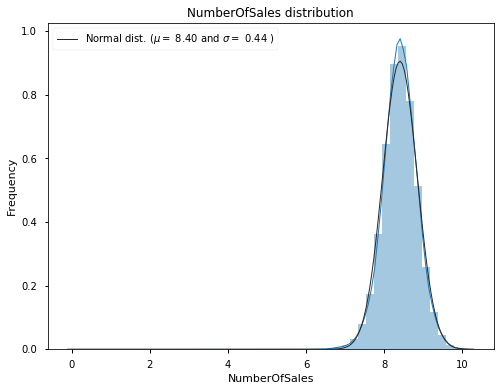

In [32]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(train['NumberOfSales'] , fit=stats.norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

# Merging train and test

In [33]:
NumberOfCustomers = train['NumberOfCustomers']
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]))

# One Hot Encoding

Encoding StoreType

In [34]:
StoreType = all_data['StoreType'];
all_data['StandardMarket'] = StoreType.apply(lambda x: 1 if x=='Standard Market' else 0);
all_data['HyperMarket'] = StoreType.apply(lambda x: 1 if x=='Hyper Market' else 0);
all_data['SuperMarket'] = StoreType.apply(lambda x: 1 if x=='Super Market' else 0);
all_data['ShoppingCenter'] = StoreType.apply(lambda x: 1 if x=='Shopping Center' else 0);

Encoding AssortmentType

In [35]:
TypeOfProducts = all_data['AssortmentType'];
all_data['General'] = TypeOfProducts.apply(lambda x: 1 if x=='General' else 0);
all_data['WithFishDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Fish Department' else 0);
all_data['WithNonFoodDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Non-Food Department' else 0);

Encoding Region

In [36]:
Region = all_data['Region'];
regionQuantity = Region.unique().size;
for i in range(0, regionQuantity-1):
    regionName = 'Region{}'.format(i);
    all_data[regionName] = Region.apply(lambda x: 1 if x==i else 0);

Encoding Month

In [37]:
months = []
all_date = all_data['Date']
for s in all_date:
    months.append(int(s[3:5]))
all_data['Month'] =months

In [38]:
import calendar

Month = all_data['Month'];
monthsQuantity = Month.unique().size
for i in range(1, monthsQuantity+1):
    monthName = calendar.month_name[i];
    all_data[monthName] = Month.apply(lambda x: 1 if x==i else 0);

Encoding Events

In [39]:
def ExtractEvents(df,col,sep):
    df[col]=df[col].astype('str').apply(lambda x: 'Nothing' if x=='nan' else x)
    events=list(df[col].unique())
    for event in events:
        if sep in event:
            event=event.split(sep)
            for i in event:
                events.append(i)
    events=list({x for x in events if sep not in x})
    for event in events:
        df[event]=df[col].astype('str').apply(lambda x: 1 if event in x else 0)
    del df[col]
    return df

all_data=ExtractEvents(all_data,'Events','-')
all_data[['Snow','Rain','Nothing']].head(10)

,Snow,Rain,Nothing
0,1,1,0
1,1,0,0
2,0,1,0
3,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0
10,0,1,0


Dropping WindDirDegrees

In [40]:
all_data = all_data.drop(labels='WindDirDegrees',axis=1)

In [41]:
all_data = all_data.drop(labels='StoreType', axis=1)
all_data = all_data.drop(labels='AssortmentType', axis=1)
all_data = all_data.drop(labels='Region', axis=1)
all_data = all_data.drop(labels='Month', axis=1)
all_data = all_data.drop(labels='Date', axis=1)

In [42]:
all_data.head()

,StoreID,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,...,September,October,November,December,Snow,Nothing,Fog,Rain,Thunderstorm,Hail
0,1000,0,0,326,9643,17130,2770,8.0,1,NaN,...,0,0,0,0,1,0,0,1,0,0
1,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,0,0,0,0,1,0,0,0,0,0
2,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,0,0,0,0,0,0,0,1,0,0
3,1000,0,0,326,9643,17130,2770,6.0,-3,NaN,...,0,0,0,0,0,1,0,0,0,0
5,1000,0,1,326,9643,17130,2770,NaN,-2,NaN,...,0,0,0,0,0,1,0,0,0,0


# Analyzing missing values

In [43]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio
Max_Gust_SpeedKm_h,78.504657
CloudCover,8.810419
Min_VisibilitykM,2.419286
Mean_VisibilityKm,2.419286
Max_VisibilityKm,2.419286


Text(0.5,1,'Top Variables for % of Missing Values')

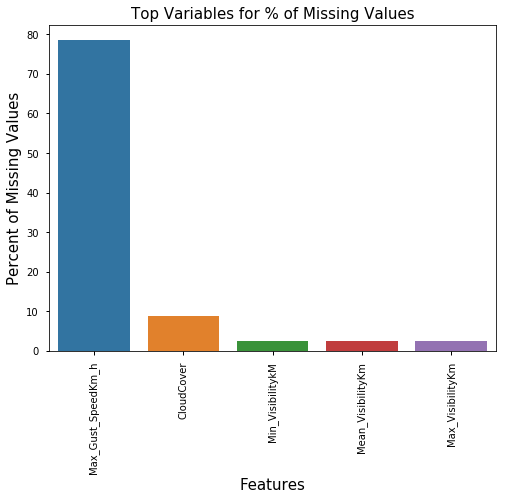

In [44]:
plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=rate.index[:10], y=rate[:10])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

## Droppinng Max_Gust_SpeedKm_h  
Too many missing values

In [45]:
all_data = all_data.drop(labels='Max_Gust_SpeedKm_h', axis=1)

## Imputing CloudCover  
Filling missing values with median to preserve an integer value

In [46]:
all_data["CloudCover"] = all_data["CloudCover"].transform(lambda x: x.fillna(x.median()))

## Imputing Visibility

In [47]:
mean_of_min = math.ceil(all_data.loc[~np.isnan(all_data['Min_VisibilitykM'])]['Min_VisibilitykM'].describe()['mean'])
mean_of_max = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])
mean_of_mean = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])

In [48]:
all_data['Max_VisibilityKm'] = all_data['Max_VisibilityKm'].fillna(mean_of_max)
all_data['Min_VisibilitykM'] = all_data['Min_VisibilitykM'].fillna(mean_of_min)
all_data['Mean_VisibilityKm'] = all_data['Mean_VisibilityKm'].fillna(mean_of_mean)

In [49]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio


In [50]:
test_offset = train.shape[0]
train = all_data.iloc[0:test_offset,:]
train = train.drop(labels='StoreID', axis=1)
test = all_data.iloc[test_offset:all_data.shape[0],:]

Saves test

In [51]:
if FeatureSelection:
    test = test.drop(labels = 'Max_Dew_PointC',axis=1)
    test = test.drop(labels = 'Max_Humidity',axis=1)
    test = test.drop(labels = 'Max_Sea_Level_PressurehPa',axis=1)
    test = test.drop(labels = 'Min_Dew_PointC',axis=1)
    test = test.drop(labels = 'Min_Humidity',axis=1)
    test = test.drop(labels = 'Min_Sea_Level_PressurehPa',axis=1)
    test = test.drop(labels = 'Min_TemperatureC',axis=1)
    test = test.drop(labels = 'Min_VisibilitykM',axis=1)
    test = test.drop(labels = 'Max_TemperatureC',axis=1)
    test = test.drop(labels = 'Max_VisibilityKm',axis=1)
    test = test.drop(labels = 'Max_Wind_SpeedKm_h',axis=1)
    test.to_csv("TestClean.csv")
else:
    test.to_csv("TestClean.csv")

# Outliers Analysis

In [52]:
def outliers(df,minq,maxq,col):
    min_v = df.quantile(minq)[col]
    max_v = df.quantile(maxq)[col]
    df1 = df.loc[df[col] > max_v]
    df2 = df.loc[df[col] < min_v]
    return pd.concat((df1,df2))[col]

In [53]:
def Winsorizing(df,minq,maxq,col):
    min_v = df.quantile(minq)[col]
    max_v = df.quantile(maxq)[col]
    df[col] = df[col].apply(lambda x: max_v if x > max_v else x)
    df[col] = df[col].apply(lambda x: min_v if x < min_v else x)

Division of features

In [54]:
bool_cols = [col for col in train if train[col].dropna().value_counts().index.isin([0,1]).all()]
binary_variables = pd.Index(bool_cols)

In [55]:
continous_variables = train.columns.difference(binary_variables)
continous_variables = continous_variables.drop('CloudCover')

In [56]:
ordinal_variables = pd.Index(['CloudCover'])

In [57]:
train = train.copy()
for v in continous_variables:
    if (100*len(outliers(train,.01,.99,v).values)/len(train[v]) < 1):
        Winsorizing(train,.01,0.99,v)  

Now the outliers are managed  
Save train

In [58]:
if FeatureSelection:
    train = train.drop(labels = 'Max_Dew_PointC',axis=1)
    train = train.drop(labels = 'Max_Humidity',axis=1)
    train = train.drop(labels = 'Max_Sea_Level_PressurehPa',axis=1)
    train = train.drop(labels = 'Min_Dew_PointC',axis=1)
    train = train.drop(labels = 'Min_Humidity',axis=1)
    train = train.drop(labels = 'Min_Sea_Level_PressurehPa',axis=1)
    train = train.drop(labels = 'Min_TemperatureC',axis=1)
    train = train.drop(labels = 'Min_VisibilitykM',axis=1)
    train = train.drop(labels = 'Max_TemperatureC',axis=1)
    train = train.drop(labels = 'Max_VisibilityKm',axis=1)
    train = train.drop(labels = 'Max_Wind_SpeedKm_h',axis=1)
    train['NumberOfSales'] = train_target
    train['NumberOfCustomers'] = NumberOfCustomers 
    train.to_csv("TrainClean.csv")
else:
    train['NumberOfSales'] = train_target
    train['NumberOfCustomers'] = NumberOfCustomers 
    train.to_csv("TrainClean.csv")

# Computing Correlation  

Numerical correlation, using Pearson Correlation

In [59]:
from scipy import stats

In [60]:
def compute_corr(df,var,degree,tar):
    new_dataset = df
    current_column = var
    corr = {}
    indexes = []
    for d in range(2,degree+1):
        column_name = var+" at the power of " + str(d)
        new_dataset[column_name] = new_dataset[current_column]*df[var]
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
        current_column = column_name
        indexes.append(current_column)
    
    if (df[var].values > 0).all():
        column_name = var+"logbase2"   
        new_dataset[column_name] = np.log2(df[var])
        indexes.append(current_column)
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
        column_name = var+"logbase10"
        new_dataset[column_name] = np.log10(df[var])
        indexes.append(current_column)
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
    
    return corr,indexes

In [62]:
if FeatureSelection:
    continous_variables = continous_variables.drop('Max_Dew_PointC')
    continous_variables = continous_variables.drop('Max_Humidity')
    continous_variables = continous_variables.drop('Max_Sea_Level_PressurehPa')
    continous_variables = continous_variables.drop('Min_Dew_PointC')
    continous_variables = continous_variables.drop('Min_Humidity')
    continous_variables = continous_variables.drop('Min_Sea_Level_PressurehPa')
    continous_variables = continous_variables.drop('Min_TemperatureC')
    continous_variables = continous_variables.drop('Min_VisibilitykM')
    continous_variables = continous_variables.drop('Max_TemperatureC')
    continous_variables = continous_variables.drop('Max_Wind_SpeedKm_h')
    continous_variables = continous_variables.drop('Max_VisibilityKm')
    continous_variables = continous_variables.append(pd.Index(['NumberOfSales','NumberOfCustomers'])) 
else:
    continous_variables = continous_variables.append(pd.Index(['NumberOfSales','NumberOfCustomers'])) 

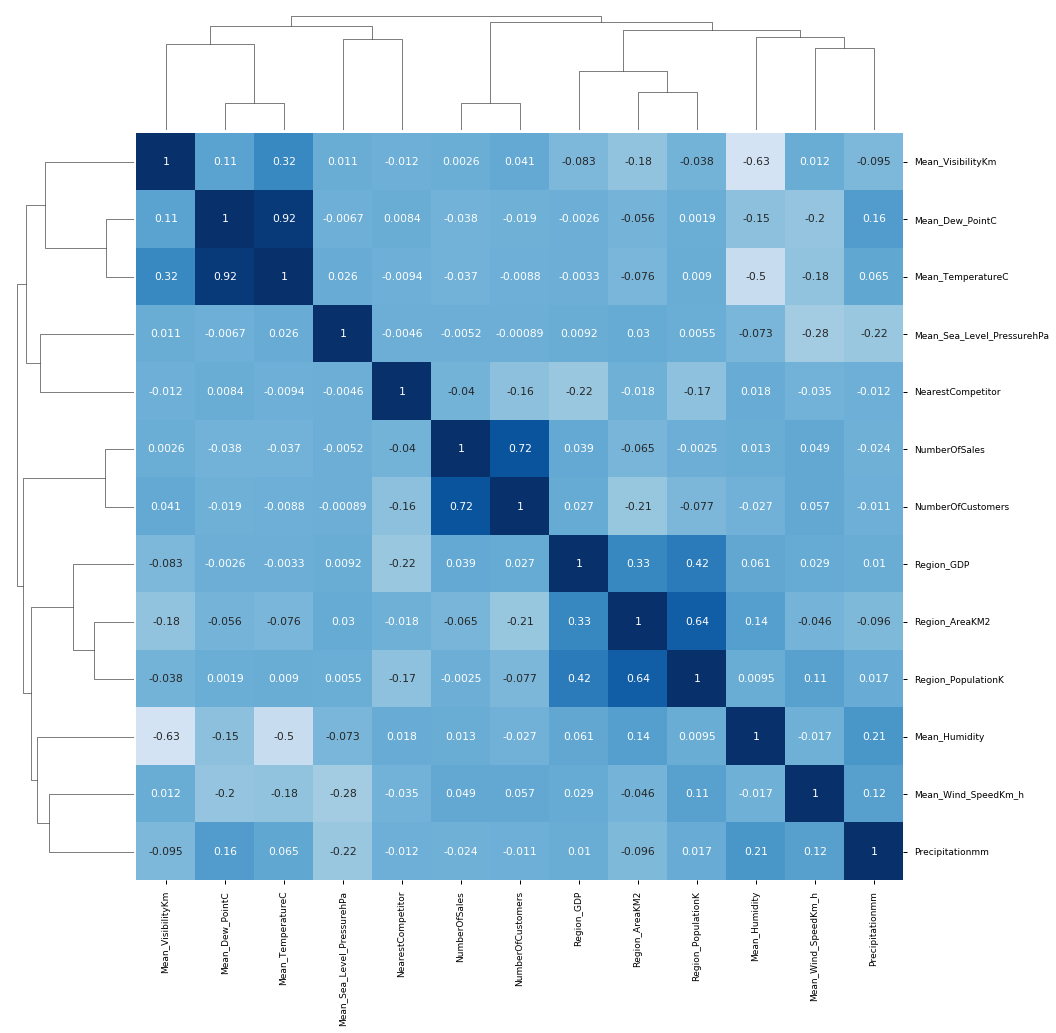

In [63]:
sns.set_context("notebook", font_scale=0.9, rc={"lines.linewidth": 2.5})
cov=train[continous_variables].corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(16, 16))
cm.cax.set_visible(False)

In [64]:
cov.loc[cov['NumberOfSales'] > 0.1]

,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,NearestCompetitor,Precipitationmm,Region_AreaKM2,Region_GDP,Region_PopulationK,NumberOfSales,NumberOfCustomers
NumberOfSales,-0.037523,0.012600,-0.005185,-0.037446,0.002589,0.049352,-0.039849,-0.024314,-0.064809,0.039459,-0.002547,1.00000,0.71892
NumberOfCustomers,-0.019123,-0.026807,-0.000886,-0.008781,0.040667,0.057263,-0.155867,-0.011007,-0.213520,0.026633,-0.077150,0.71892,1.00000


In [65]:
cov.loc[cov['NumberOfCustomers'] > 0.1]

,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,NearestCompetitor,Precipitationmm,Region_AreaKM2,Region_GDP,Region_PopulationK,NumberOfSales,NumberOfCustomers
NumberOfSales,-0.037523,0.012600,-0.005185,-0.037446,0.002589,0.049352,-0.039849,-0.024314,-0.064809,0.039459,-0.002547,1.00000,0.71892
NumberOfCustomers,-0.019123,-0.026807,-0.000886,-0.008781,0.040667,0.057263,-0.155867,-0.011007,-0.213520,0.026633,-0.077150,0.71892,1.00000


In [66]:
correlations = {}
indexes = {}
for v in continous_variables:
   correlations[v],indexes[v] = compute_corr(train,v,4,'NumberOfSales');

In [67]:
for v in continous_variables:
    for k in indexes[v]:
        if (np.absolute(correlations[v][k]) > 0.6 and v!='NumberOfSales'):
            print(" Pearson Correlation:="+str(correlations[v][k]))

In [68]:
correlations = {}
indexes = {}
for v in continous_variables:
   correlations[v],indexes[v] = compute_corr(train,v,4,'NumberOfCustomers');

In [69]:
for v in continous_variables:
    for k in indexes[v]:
        if (np.absolute(correlations[v][k]) > 0.6 and v!='NumberOfCustomers' and v!='NumberOfSales'):
            print(k+"Pearson Correlation:="+str(correlations[v][k]))

In [70]:
point_biserial = {}
for col in binary_variables:
        point_biserial[col] = round(stats.pointbiserialr(train[col].values,train["NumberOfSales"].values)[0],3)
        if (np.absolute(point_biserial[col]) > 0.1):
            print(col+" Point Biserial Correlation:="+str(point_biserial[col]))

HasPromotions Point Biserial Correlation:=0.372
ShoppingCenter Point Biserial Correlation:=0.107
General Point Biserial Correlation:=-0.14
WithNonFoodDepartment Point Biserial Correlation:=0.131
Region3 Point Biserial Correlation:=0.136
December Point Biserial Correlation:=0.132


In [71]:
point_biserial_1 = {}
for col in binary_variables:
        point_biserial_1[col] = round(stats.pointbiserialr(train[col].values,train["NumberOfCustomers"].values)[0],3)
        if (np.absolute(point_biserial[col]) > 0.1):
            print(col+" Point Biserial Correlation:="+str(point_biserial_1[col]))

HasPromotions Point Biserial Correlation:=0.193
ShoppingCenter Point Biserial Correlation:=0.376
General Point Biserial Correlation:=-0.023
WithNonFoodDepartment Point Biserial Correlation:=-0.022
Region3 Point Biserial Correlation:=0.228
December Point Biserial Correlation:=0.094
